## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [11]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [13]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [14]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/20


KeyboardInterrupt: 

Test score: 0.3354244603395462
Test accuracy: 0.9069


<IPython.core.display.Javascript object>


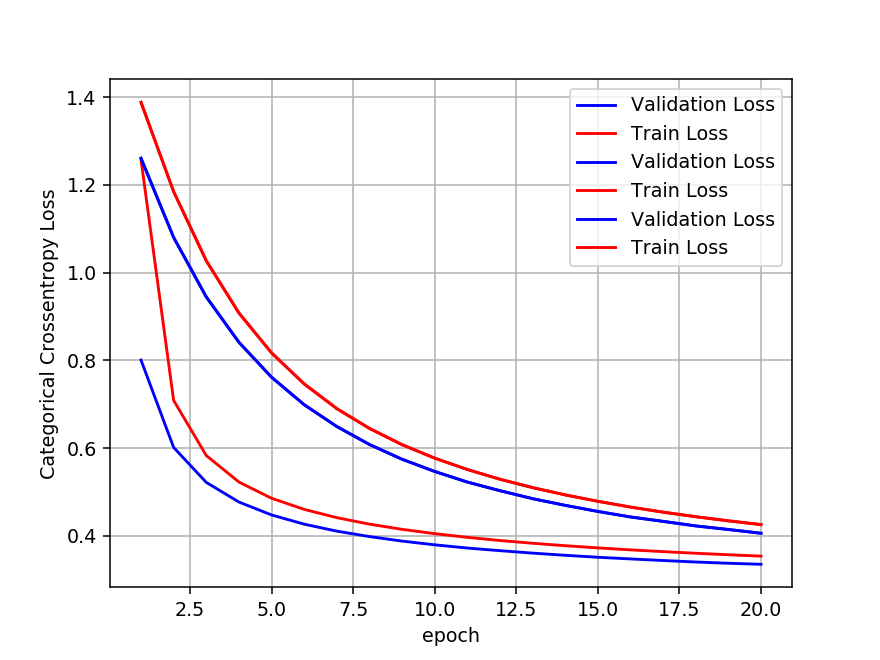

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [65]:
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = 'cc-{}'.format(int(time.time()))
tensorboardd = TensorBoard(log_dir='logss\{}'.format(NAME))

In [25]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/step - loss: 2.2695 - acc: 0.2130 - val_loss: 2.2223 - val_acc: 0.3461
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 2.1788 - acc: 0.4249 - val_loss: 2.1235 - val_acc: 0.5385
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 2.0633 - acc: 0.5512 - val_loss: 1.9838 - val_acc: 0.5830
Epoch 4/20
60000/60000 [==============================] - 3s 46us/step - loss: 1.8999 - acc: 0.6140 - val_loss: 1.7913 - val_acc: 0.6567
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 1.6903 - acc: 0.6657 - val_loss: 1.5611 - val_acc: 0.6965
Epoch 6/20
60000/60000 [==============================] - 3s 45us/step - loss: 1.4617 - acc: 0.7044 - val_loss: 1.3353 - val_acc: 0.7263
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 1.2525 - acc: 0.7380 - val_loss: 1.1441 - val_acc

In [1]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

NameError: name 'model' is not defined

<IPython.core.display.Javascript object>


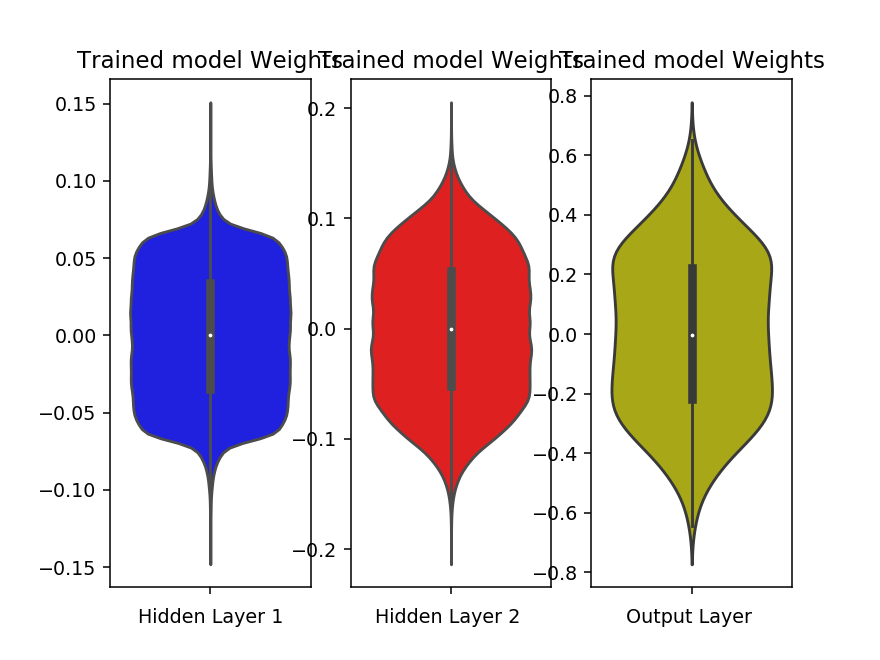

In [28]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [34]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.5294 - acc: 0.8621 - val_loss: 0.2580 - val_acc: 0.9256
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.2236 - acc: 0.9338 - val_loss: 0.1903 - val_acc: 0.9429
Epoch 3/20
60000/60000 [==============================

Test score: 0.07668884656769806
Test accuracy: 0.9802


<IPython.core.display.Javascript object>


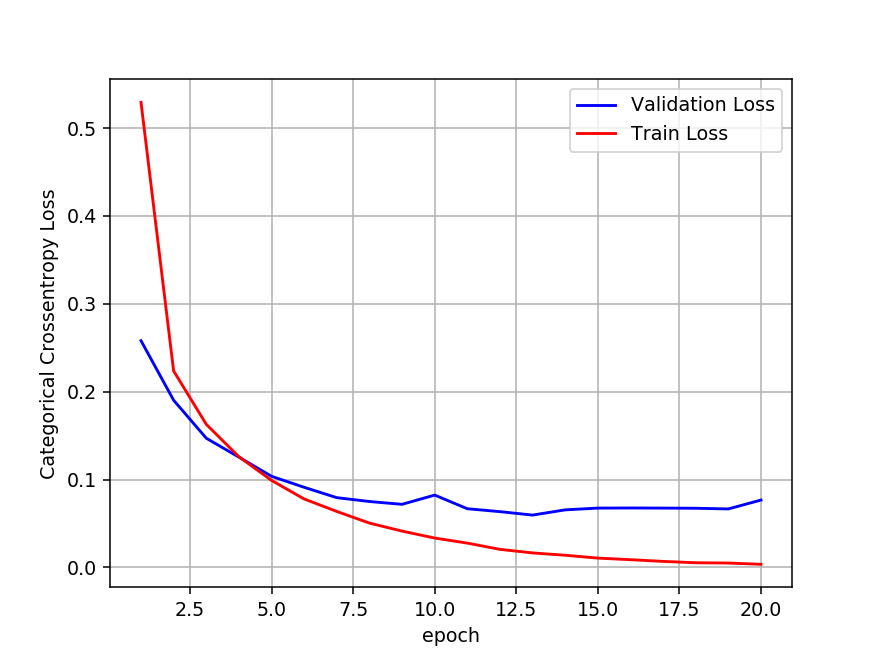

In [35]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


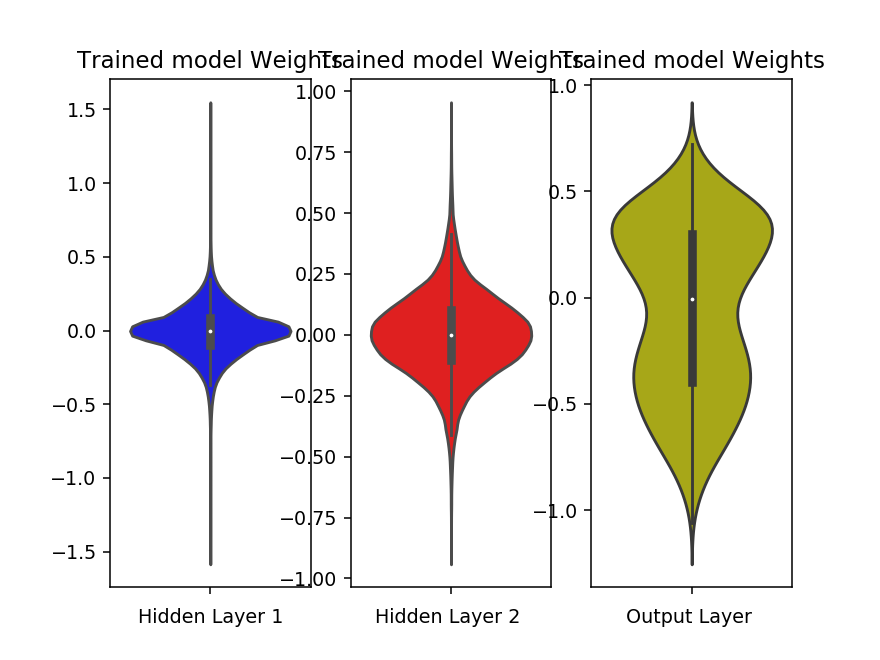

In [36]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [37]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.7253 - acc: 0.7946 - val_loss: 0.3834 - val_acc: 0.8899
Epoch 2/20
60000/60000 [==============================] - 2s 42us/step - loss: 0.3531 - acc: 0.8999 - val_loss: 0.2994 - val_acc: 0.9154
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2921 - acc: 0.9172 - val_loss: 0.2621 - val_acc: 0.9251
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2574 - acc: 0.9267 - val_loss: 0.2376 - val_acc: 0.9320
Epoch 5/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.2333 - acc: 0.9332 - val_loss: 0.2196 - val_acc: 0.9378
Epoch 6/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.2145 - acc: 0.9390 - val_loss: 0.2058 - val_acc: 0.9402
Epoch 7/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.1991 - acc: 0.9428 - val_loss: 0.1967 - val_acc

Test score: 0.12520071088634432
Test accuracy: 0.964


<IPython.core.display.Javascript object>


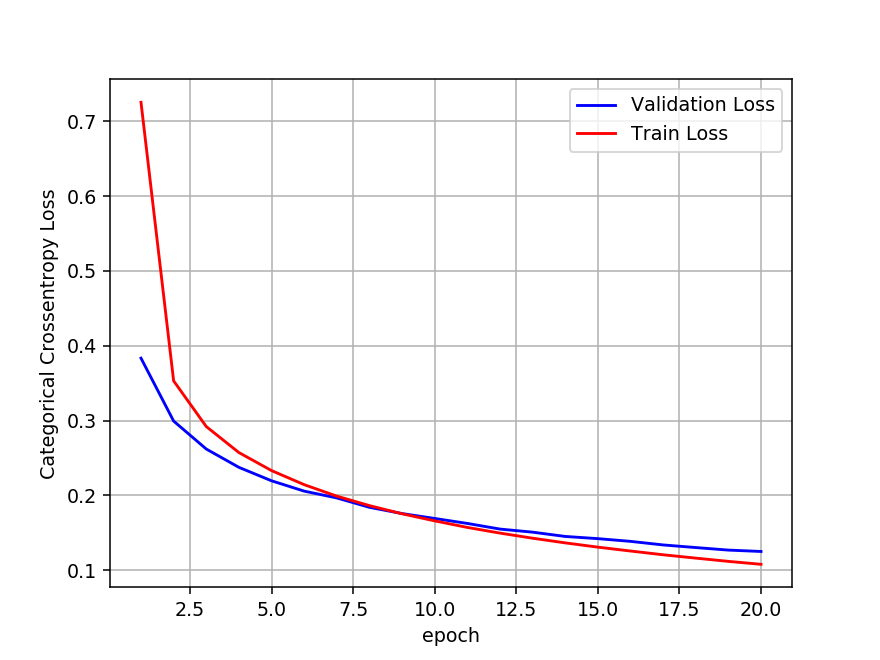

In [39]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


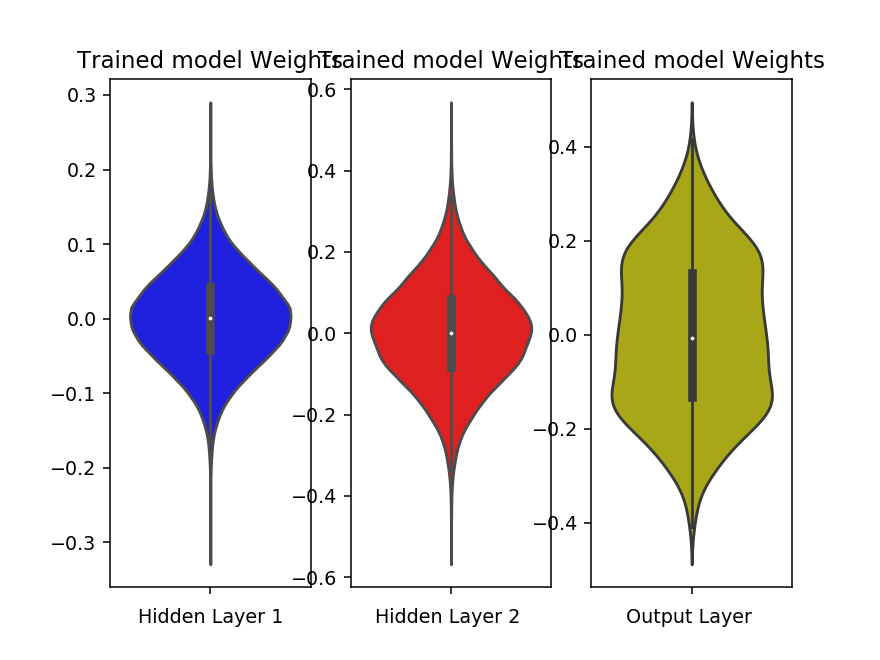

In [40]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [41]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2218 - acc: 0.9331 - val_loss: 0.1144 - val_acc: 0.9651
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0840 - acc: 0.9747 - val_loss: 0.0884 - val_acc: 0.9718
Epoch 3/20
60000/60000 [=========================

Test score: 0.11140352230805939
Test accuracy: 0.9768


<IPython.core.display.Javascript object>


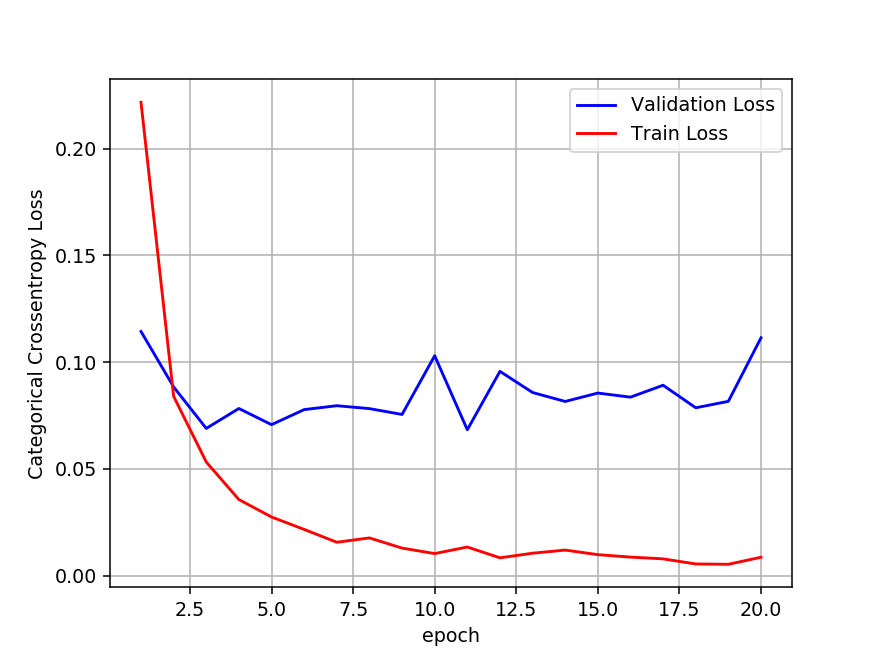

In [42]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


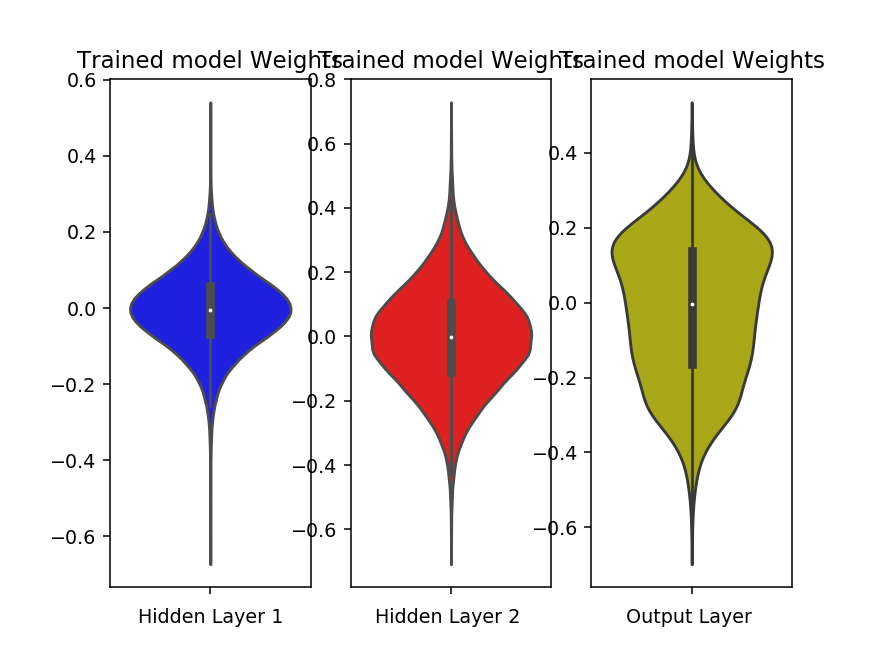

In [43]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [15]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [45]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.3003 - acc: 0.9115 - val_loss: 0.2204 - val_acc: 0.9340
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.1738 - acc: 0.9486 - val_loss: 0.1694 - val_acc: 0.9498
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.1354 - acc: 0.9598 - val_loss: 0.1436 - val_acc: 0.9553
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1132 - acc: 0.9667 - val_loss: 0.1332 - val_acc: 0.9594
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0926 - acc: 0.9716 - val_loss: 0.1207 - val_acc: 0.9634
Epoch 6/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0824 - acc: 0.9748 - val_loss: 0.1135 - val_acc: 0.9646
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0706 - acc: 0.9781 - val_loss: 0.1173 - val_ac

Test score: 0.10525882752165198
Test accuracy: 0.9735


<IPython.core.display.Javascript object>


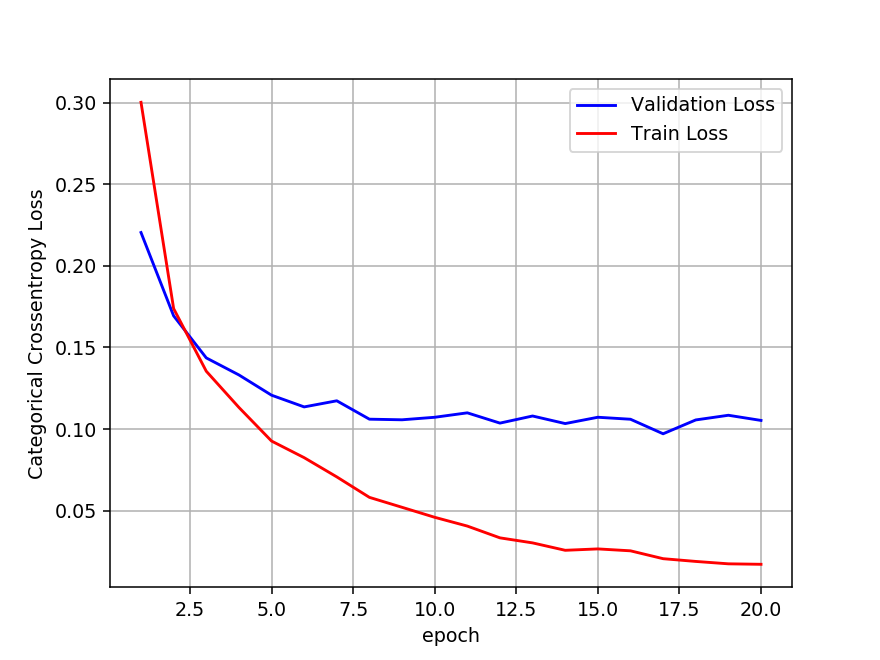

In [46]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


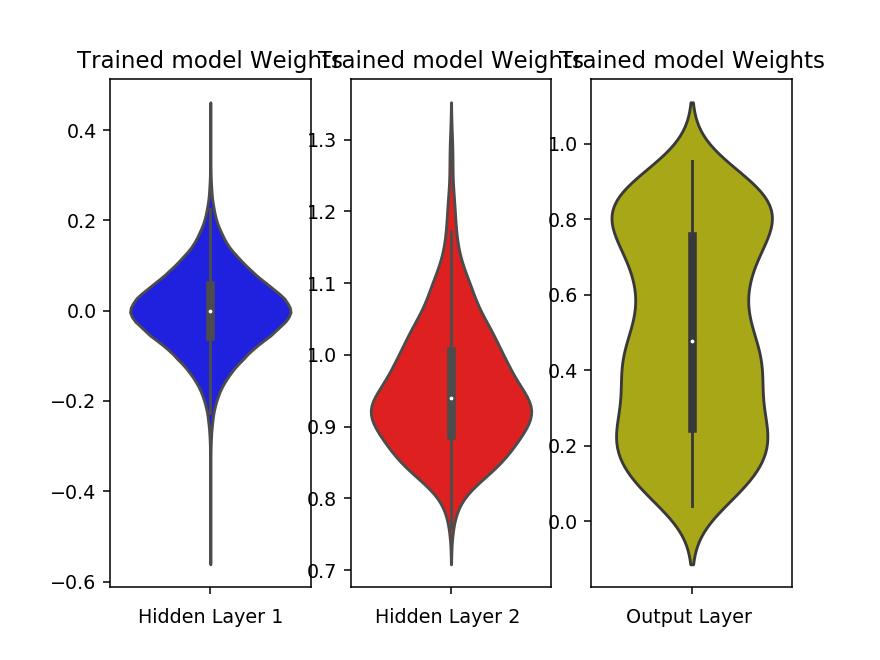

In [47]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [16]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_____

In [18]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.6815 - acc: 0.7898 - val_loss: 0.3003 - val_acc: 0.9099
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.4357 - acc: 0.8681 - val_loss: 0.2524 - val_acc: 0.9262
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3831 - acc: 0.8834 - val_loss: 0.2312 - val_acc: 0.9326
Epoch 4/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3559 - acc: 0.8928 - val_loss: 0.2185 - val_acc: 0.9344
Epoch 5/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3311 - acc: 0.8997 - val_loss: 0.2140 - val_acc: 0.9391
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3208 - acc: 0.9033 - val_loss: 0.2032 - val_acc: 0.9386
Epoch 7/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.3044 - acc: 0.9074 - val_loss: 0.1965 - val_ac

Test score: 0.1098791686380282
Test accuracy: 0.9667


<IPython.core.display.Javascript object>


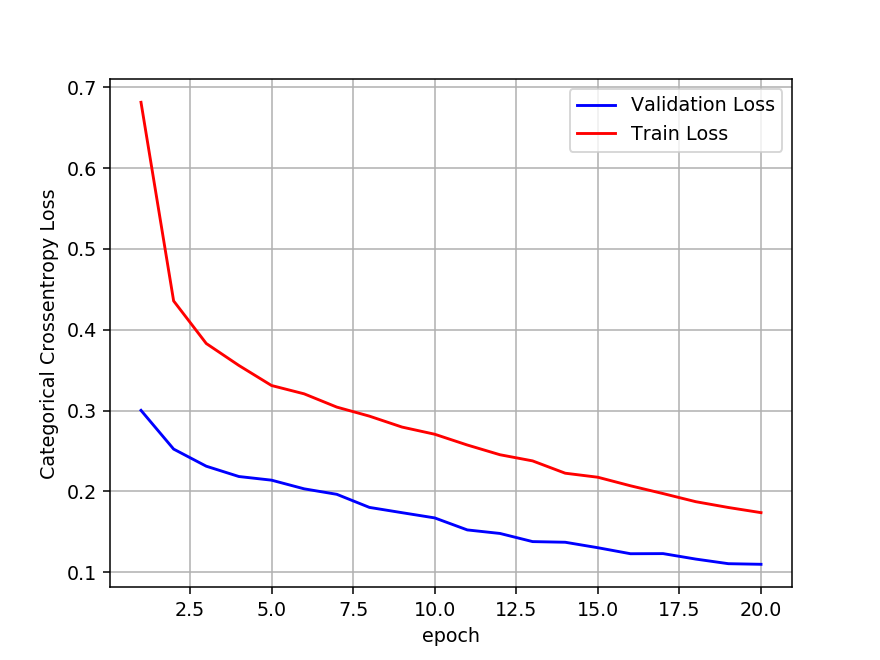

In [19]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


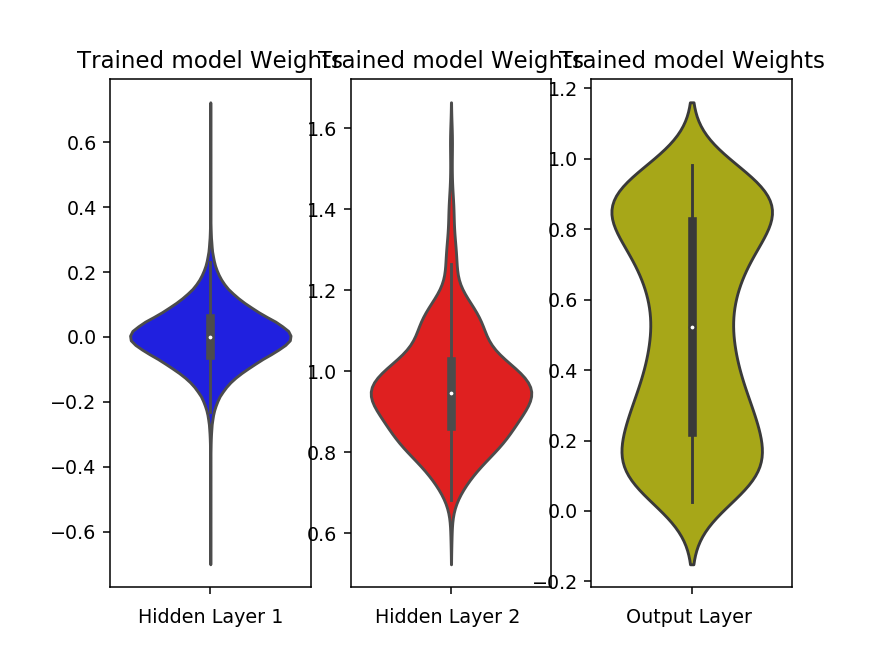

In [20]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [21]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [23]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
import time
start_time = time.time()

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Execution time: 322.01695251464844 ms


In [24]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975867 using {'activ': 'sigmoid'}
0.975867 (0.001274) with: {'activ': 'sigmoid'}
0.973517 (0.004000) with: {'activ': 'relu'}


# Assignment :

We'll fix Adam optimizer and Relu activation units for all the architechtures

### ARCHITECTURE 1(624,430) : MLP + Batch-Norm and Dropout(0.5) on hidden Layers

In [16]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_arch1 = Sequential()

model_arch1.add(Dense(624, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.056, seed=None)))
model_arch1.add(BatchNormalization())
model_arch1.add(Dropout(0.5))

model_arch1.add(Dense(430, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.068, seed=None)) )
model_arch1.add(BatchNormalization())
model_arch1.add(Dropout(0.5))

model_arch1.add(Dense(output_dim, activation='softmax'))


model_arch1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 624)               489840    
_________________________________________________________________
batch_normalization_1 (Batch (None, 624)               2496      
_________________________________________________________________
dropout_1 (Dropout)          (None, 624)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 430)               268750    
_________________________________________________________________
batch_normalization_2 (Batch (None, 430)               1720      
_________________________________________________________________
dropout_2 (Dropout)          (None, 430)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [18]:
model_arch1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_arch1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.1941 - acc: 0.9409 - val_loss: 0.0989 - val_acc: 0.9698
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1417 - acc: 0.9565 - val_loss: 0.0824 - val_acc: 0.9745
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.1164 - acc: 0.9639 - val_loss: 0.0748 - val_acc: 0.9766
Epoch 4/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.1035 - acc: 0.9667 - val_loss: 0.0716 - val_acc: 0.9778
Epoch 5/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0918 - acc: 0.9710 - val_loss: 0.0672 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0838 - acc: 0.9734 - val_loss: 0.0637 - val_acc: 0.9799
Epoch 7/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0779 - acc: 0.9754 - val_loss: 0.0598 - val_ac

Test score: 0.052614248323663196
Test accuracy: 0.9851


<IPython.core.display.Javascript object>


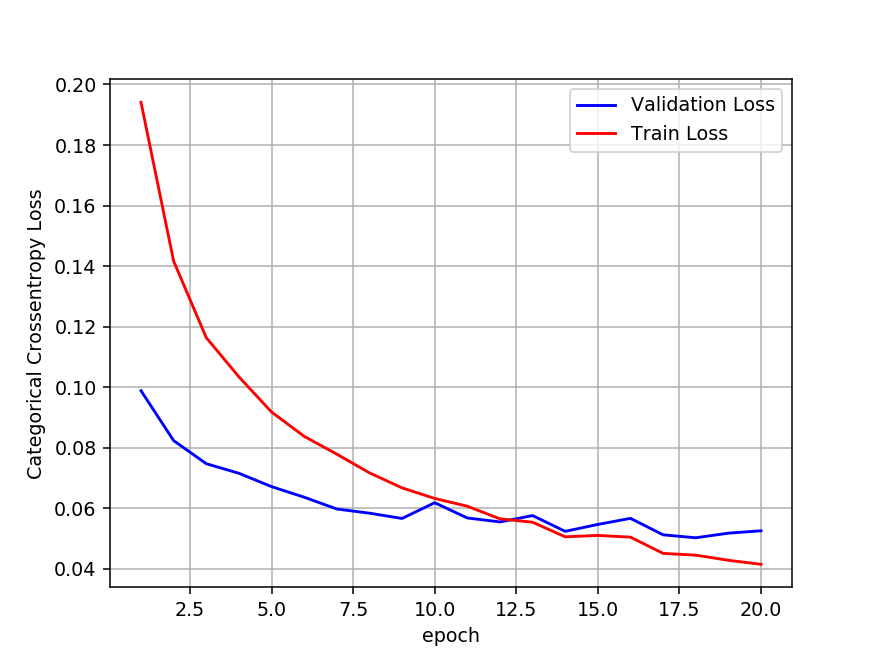

In [19]:
score = model_arch1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


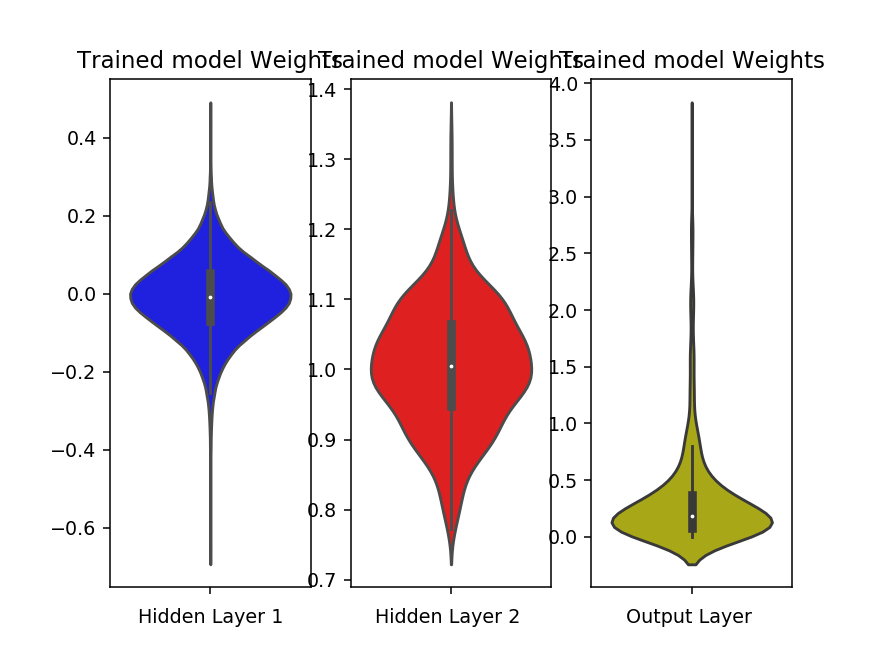

In [20]:
w_after = model_arch1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### ARCHITECTURE 2(512,364,58) : MLP + Batch-Norm and Dropout(0.5) on hidden Layers

In [27]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_arch2 = Sequential()

model_arch2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_arch2.add(BatchNormalization())
model_arch2.add(Dropout(0.5))

model_arch2.add(Dense(364, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_arch2.add(BatchNormalization())
model_arch2.add(Dropout(0.5))

model_arch2.add(Dense(58, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.185, seed=None)) )
model_arch2.add(BatchNormalization())
model_arch2.add(Dropout(0.5))

model_arch2.add(Dense(output_dim, activation='softmax'))


model_arch2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 364)               186732    
_________________________________________________________________
batch_normalization_7 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_7 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 58)               

In [28]:
model_arch2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_arch2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.6757 - acc: 0.7967 - val_loss: 0.1893 - val_acc: 0.9429
Epoch 2/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.2895 - acc: 0.9178 - val_loss: 0.1307 - val_acc: 0.9589
Epoch 3/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.2192 - acc: 0.9370 - val_loss: 0.1014 - val_acc: 0.9693
Epoch 4/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.1824 - acc: 0.9481 - val_loss: 0.1002 - val_acc: 0.9706
Epoch 5/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.1606 - acc: 0.9540 - val_loss: 0.0908 - val_acc: 0.9731
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.1412 - acc: 0.9589 - val_loss: 0.0840 - val_acc: 0.9762
Epoch 7/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1270 - acc: 0.9629 - val_loss: 0.0738 - 

Test score: 0.060684567966146276
Test accuracy: 0.9819


<IPython.core.display.Javascript object>


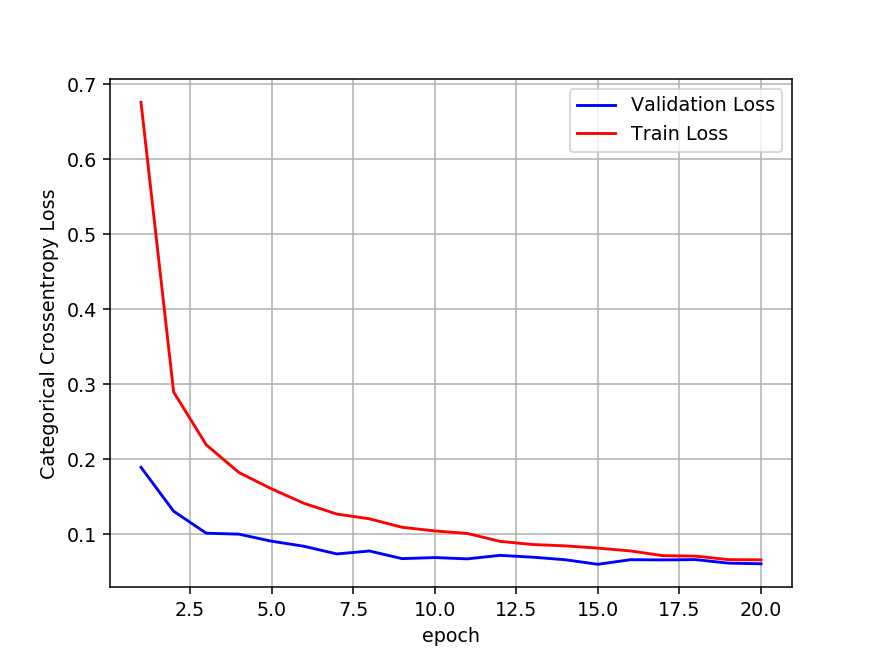

In [29]:
score = model_arch2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


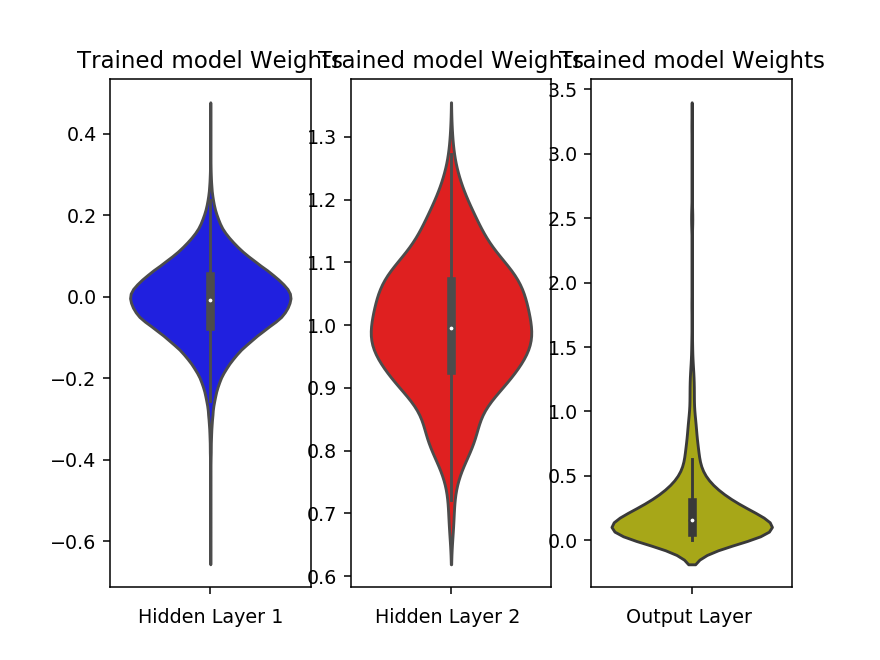

In [30]:
w_after = model_arch2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### ARCHITECTURE 3(584,452,312,256,128) : MLP + Batch-Norm and Dropout(0.5) on hidden Layers

In [31]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_arch3 = Sequential()

model_arch3.add(Dense(584, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))
model_arch3.add(BatchNormalization())
model_arch3.add(Dropout(0.5))

model_arch3.add(Dense(452, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.066, seed=None)))
model_arch3.add(BatchNormalization())
model_arch3.add(Dropout(0.5))

model_arch3.add(Dense(312, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.080, seed=None)))
model_arch3.add(BatchNormalization())
model_arch3.add(Dropout(0.5))

model_arch3.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_arch3.add(BatchNormalization())
model_arch3.add(Dropout(0.5))

model_arch3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_arch3.add(BatchNormalization())
model_arch3.add(Dropout(0.5))

model_arch3.add(Dense(output_dim, activation='softmax'))


model_arch3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 584)               458440    
_________________________________________________________________
batch_normalization_9 (Batch (None, 584)               2336      
_________________________________________________________________
dropout_9 (Dropout)          (None, 584)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 452)               264420    
_________________________________________________________________
batch_normalization_10 (Batc (None, 452)               1808      
_________________________________________________________________
dropout_10 (Dropout)         (None, 452)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 312)              

In [32]:
model_arch3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_arch3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.9959 - acc: 0.6929 - val_loss: 0.2367 - val_acc: 0.9306
Epoch 2/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.3420 - acc: 0.9013 - val_loss: 0.1591 - val_acc: 0.9543
Epoch 3/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.2548 - acc: 0.9276 - val_loss: 0.1313 - val_acc: 0.9630
Epoch 4/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.2115 - acc: 0.9397 - val_loss: 0.1108 - val_acc: 0.9698
Epoch 5/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.1807 - acc: 0.9502 - val_loss: 0.1017 - val_acc: 0.9701
Epoch 6/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.1634 - acc: 0.9547 - val_loss: 0.0958 - val_acc: 0.9742
Epoch 7/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.1514 - acc: 0.9578 - val_loss: 0.0874 -

Test score: 0.06401680134190246
Test accuracy: 0.9828


<IPython.core.display.Javascript object>


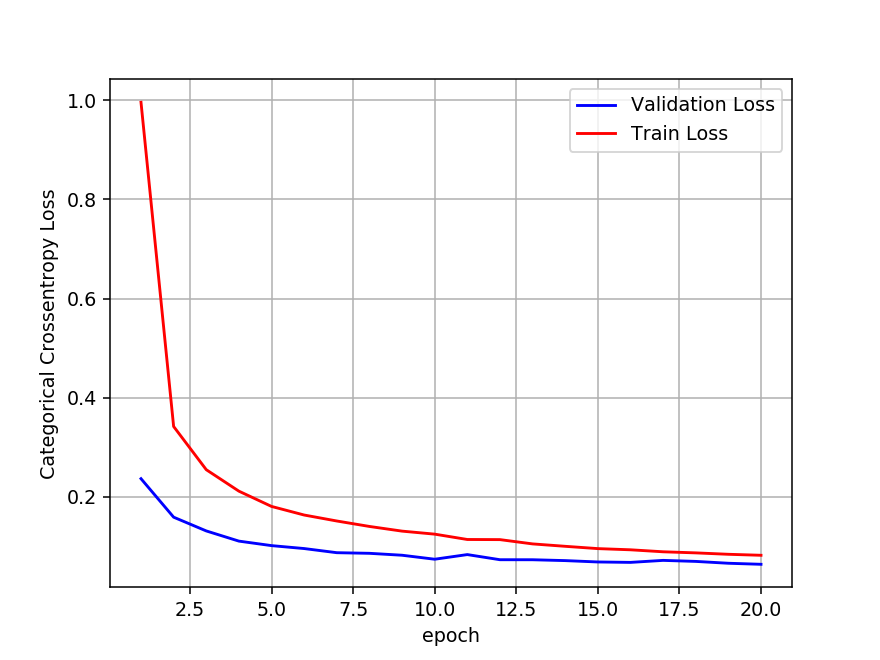

In [33]:
score = model_arch3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


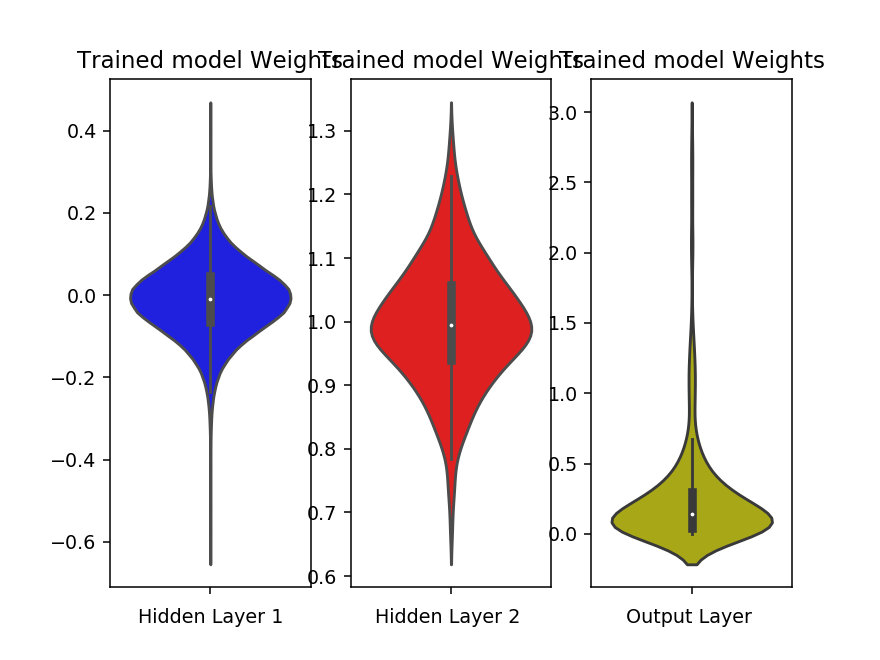

In [34]:
w_after = model_arch3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Now lets play around with Dropout rates, Batch nomalization and without batch normalization

### ARCHITECTURE 4(682,452,312,256,128,64) : MLP + Batch-Norm and Dropout(0.6,0.3,0.3,0.5,0.3,0.2), Relu on hidden Layers

In [13]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_arch4 = Sequential()

model_arch4.add(Dense(682, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.054, seed=None)))
model_arch4.add(BatchNormalization())
model_arch4.add(Dropout(0.6))

model_arch4.add(Dense(452, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.066, seed=None)))
model_arch4.add(BatchNormalization())
model_arch4.add(Dropout(0.3))

model_arch4.add(Dense(312, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.080, seed=None)))
model_arch4.add(BatchNormalization())
model_arch4.add(Dropout(0.3))

model_arch4.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_arch4.add(BatchNormalization())
model_arch4.add(Dropout(0.5))

model_arch4.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_arch4.add(BatchNormalization())
model_arch4.add(Dropout(0.3))

model_arch4.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_arch4.add(BatchNormalization())
model_arch4.add(Dropout(0.2))

model_arch4.add(Dense(output_dim, activation='softmax'))


model_arch4.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 682)               535370    
_________________________________________________________________
batch_normalization_1 (Batch (None, 682)               2728      
_________________________________________________________________
dropout_1 (Dropout)          (None, 682)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 452)               308716    
_________________________________________________________________
batch_normalization_2 (Batch (None, 452)               1808      
_________________________________________________________________
dropout_2 (Dropout)          (None, 452)               0         


In [15]:
model_arch4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_arch4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.8202 - acc: 0.7423 - val_loss: 0.2126 - val_acc: 0.9380
Epoch 2/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.3129 - acc: 0.9115 - val_loss: 0.1401 - val_acc: 0.9603
Epoch 3/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.2395 - acc: 0.9329 - val_loss: 0.1222 - val_acc: 0.9646
Epoch 4/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.2044 - acc: 0.9426 - val_loss: 0.1146 - val_acc: 0.9691
Epoch 5/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.1830 - acc: 0.9472 - val_loss: 0.0944 - val_acc: 0.9736
Epoch 6/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.1638 - acc: 0.9534 - val_loss: 0.0872 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 31s 524us/step - loss: 0.1553 - acc: 0.9554 - val_loss: 0.092

Test score: 0.06279641111334786
Test accuracy: 0.9833


<IPython.core.display.Javascript object>


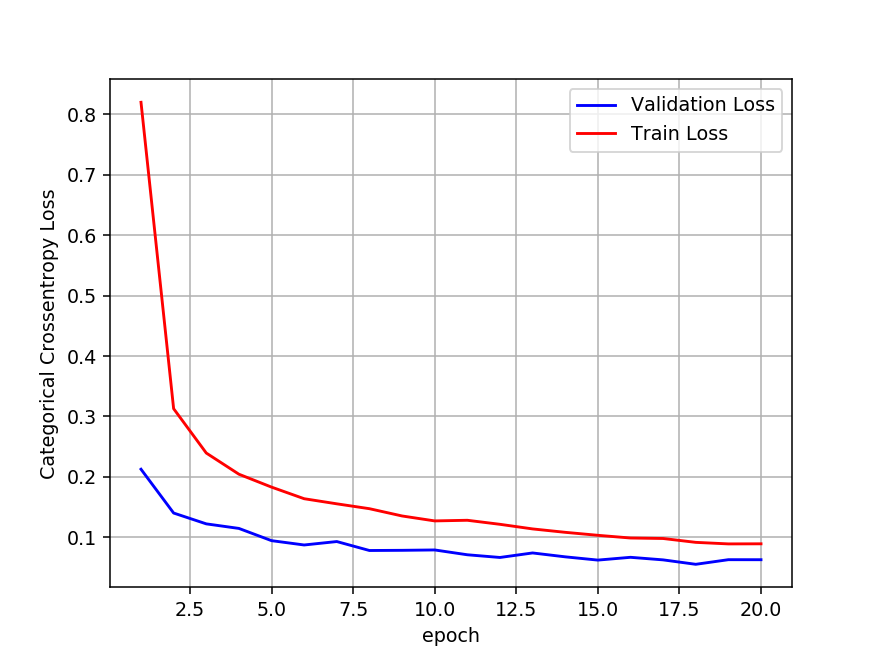

In [16]:
score = model_arch4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


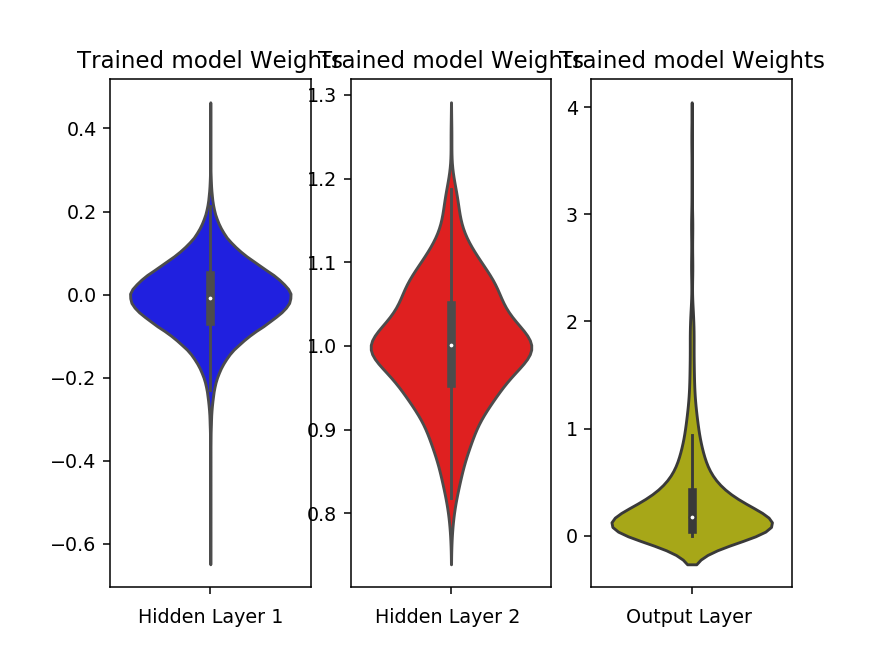

In [17]:
w_after = model_arch4.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Lets increase the number of epochs, that might increase the accuracy

### ARCHITECTURE 5(624,430) : MLP + Batch-Norm and Dropout(0.6,0.5) on hidden Layers, 50 epochs

In [18]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_arch5 = Sequential()

model_arch5.add(Dense(624, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.056, seed=None)))
model_arch5.add(BatchNormalization())
model_arch5.add(Dropout(0.6))

model_arch5.add(Dense(430, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.068, seed=None)) )
model_arch5.add(BatchNormalization())
model_arch5.add(Dropout(0.5))

model_arch5.add(Dense(output_dim, activation='softmax'))


model_arch5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 624)               489840    
_________________________________________________________________
batch_normalization_7 (Batch (None, 624)               2496      
_________________________________________________________________
dropout_7 (Dropout)          (None, 624)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 430)               268750    
_________________________________________________________________
batch_normalization_8 (Batch (None, 430)               1720      
_________________________________________________________________
dropout_8 (Dropout)          (None, 430)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [19]:
model_arch5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_arch5.fit(X_train, Y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 20s 338us/step - loss: 0.4291 - acc: 0.8716 - val_loss: 0.1334 - val_acc: 0.9579
Epoch 2/50
60000/60000 [==============================] - 16s 266us/step - loss: 0.2051 - acc: 0.9376 - val_loss: 0.1046 - val_acc: 0.9676
Epoch 3/50
60000/60000 [==============================] - 17s 281us/step - loss: 0.1646 - acc: 0.9494 - val_loss: 0.0916 - val_acc: 0.9725
Epoch 4/50
60000/60000 [==============================] - 16s 261us/step - loss: 0.1397 - acc: 0.9570 - val_loss: 0.0843 - val_acc: 0.9740
Epoch 5/50
60000/60000 [==============================] - 15s 258us/step - loss: 0.1229 - acc: 0.9614 - val_loss: 0.0739 - val_acc: 0.9778
Epoch 6/50
60000/60000 [==============================] - 16s 261us/step - loss: 0.1126 - acc: 0.9645 - val_loss: 0.0732 - val_acc: 0.9769
Epoch 7/50
60000/60000 [==============================] - 15s 256us/step - loss: 0.1038 - acc: 0.9674 - val_loss: 0.

Test score: 0.05426391864952348
Test accuracy: 0.9853


<IPython.core.display.Javascript object>


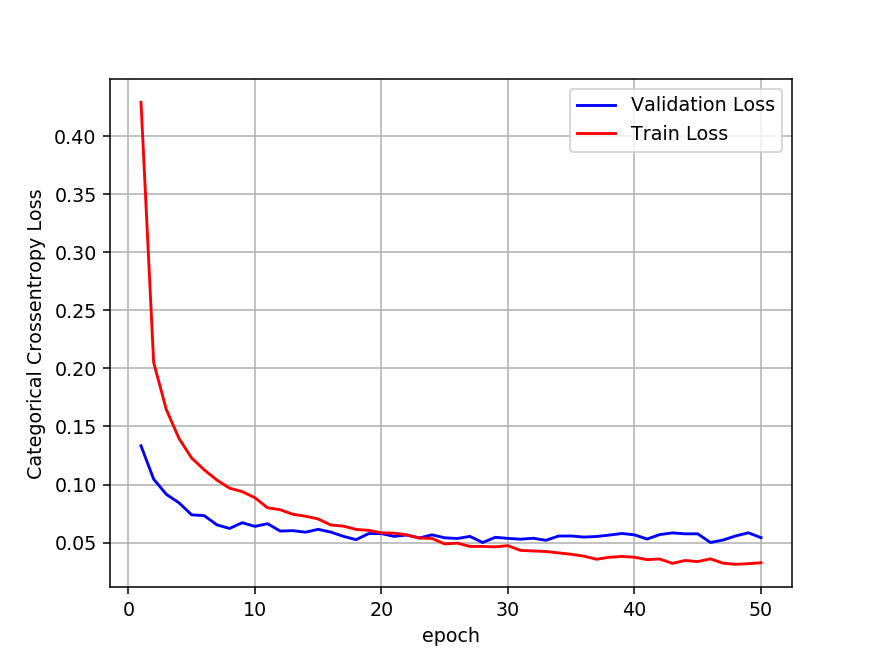

In [20]:
score = model_arch5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,50+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


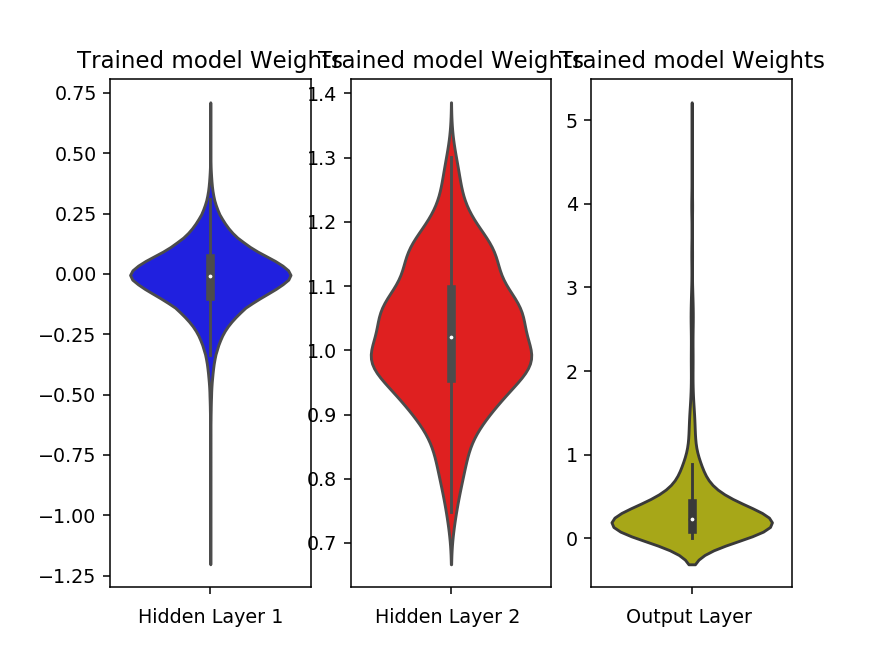

In [21]:
w_after = model_arch5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### ARCHITECTURE 6(512,430,320) : MLP + without Batch-Norm and Dropout(0.7,0.5,0.2) on hidden Layers, 50 epochs and sigmoid on hidden layers

In [22]:
# from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_arch6 = Sequential()

model_arch6.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
# model_arch5.add(BatchNormalization())
model_arch6.add(Dropout(0.7))

model_arch6.add(Dense(430, activation='sigmoid') )
# model_arch5.add(BatchNormalization())
model_arch6.add(Dropout(0.5))

model_arch6.add(Dense(320, activation='sigmoid') )
# model_arch5.add(BatchNormalization())
model_arch6.add(Dropout(0.2))

model_arch6.add(Dense(output_dim, activation='softmax'))


model_arch6.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 430)               220590    
_________________________________________________________________
dropout_10 (Dropout)         (None, 430)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 320)               137920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 320)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [23]:
model_arch6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_arch6.fit(X_train, Y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.8386 - acc: 0.7214 - val_loss: 0.2939 - val_acc: 0.9114
Epoch 2/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.3561 - acc: 0.8913 - val_loss: 0.2205 - val_acc: 0.9302
Epoch 3/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.2793 - acc: 0.9145 - val_loss: 0.1808 - val_acc: 0.9436
Epoch 4/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.2379 - acc: 0.9277 - val_loss: 0.1604 - val_acc: 0.9515
Epoch 5/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.2134 - acc: 0.9345 - val_loss: 0.1386 - val_acc: 0.9569
Epoch 6/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1897 - acc: 0.9415 - val_loss: 0.1263 - val_acc: 0.9616
Epoch 7/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1785 - acc: 0.9453 - val_loss: 0.1202 - val_acc

Test score: 0.06514910679099849
Test accuracy: 0.9823


<IPython.core.display.Javascript object>


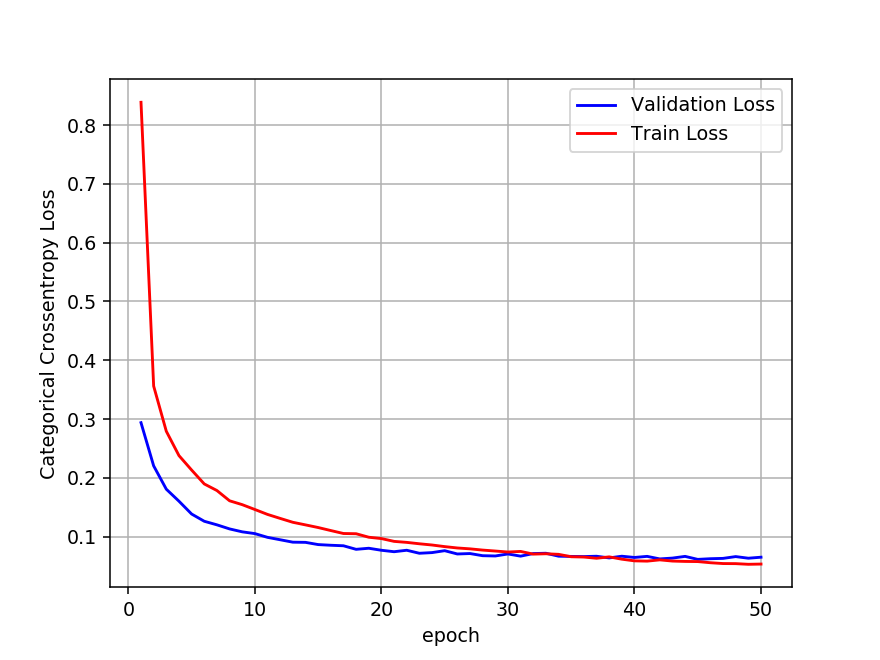

In [24]:
score = model_arch6.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,50+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


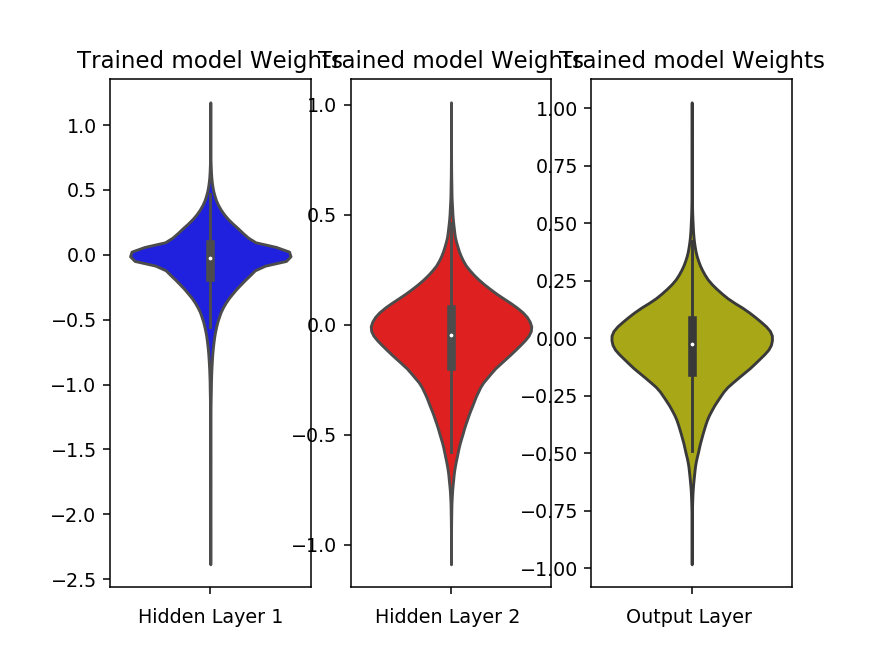

In [25]:
w_after = model_arch6.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### ARCHITECTURE 7(624,430) : MLP + without Batch-Norm and Dropout(0.6,0.3) on hidden Layers, 100 epochs with Relu in hidden layers

In [26]:
# from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_arch7 = Sequential()

model_arch7.add(Dense(624, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.056, seed=None)))
# model_arch7.add(BatchNormalization())
model_arch7.add(Dropout(0.6))

model_arch7.add(Dense(430, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.068, seed=None)) )
# model_arch7.add(BatchNormalization())
model_arch7.add(Dropout(0.3))

model_arch7.add(Dense(output_dim, activation='softmax'))


model_arch7.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 624)               489840    
_________________________________________________________________
dropout_12 (Dropout)         (None, 624)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 430)               268750    
_________________________________________________________________
dropout_13 (Dropout)         (None, 430)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                4310      
Total params: 762,900
Trainable params: 762,900
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_arch7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_arch7.fit(X_train, Y_train, batch_size=batch_size, epochs=100, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.3829 - acc: 0.8818 - val_loss: 0.1313 - val_acc: 0.9583
Epoch 2/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1808 - acc: 0.9444 - val_loss: 0.0982 - val_acc: 0.9680
Epoch 3/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1444 - acc: 0.9565 - val_loss: 0.0859 - val_acc: 0.9736
Epoch 4/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1241 - acc: 0.9610 - val_loss: 0.0720 - val_acc: 0.9782
Epoch 5/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1091 - acc: 0.9658 - val_loss: 0.0658 - val_acc: 0.9794
Epoch 6/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0998 - acc: 0.9685 - val_loss: 0.0711 - val_acc: 0.9783
Epoch 7/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0926 - acc: 0.9713 - val_loss: 0.0667 - 

Test score: 0.07392368958264603
Test accuracy: 0.9838


<IPython.core.display.Javascript object>


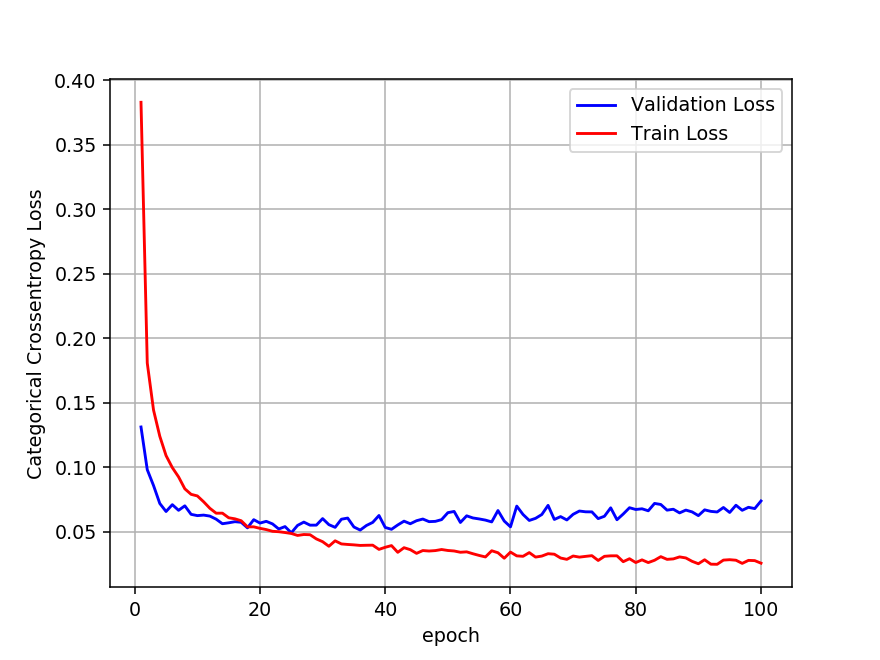

In [28]:
score = model_arch7.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,100+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


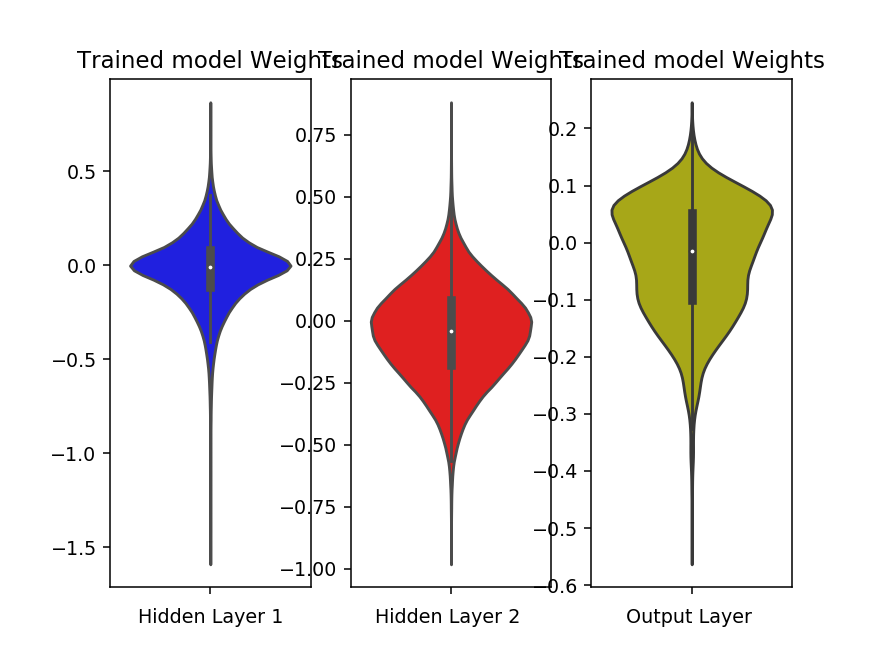

In [29]:
w_after = model_arch7.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Results(Pretty Table)

In [32]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Architecture No.","Layers","Dropout rate", "Test loss", "Test Accuracy","Epochs","Batch Norm or not"]
x.add_row(["1","(624,430)", "(0.5,0.5)" ,"0.052", "0.985", "20","YES"])
x.add_row(["2","(512,364,58)", "(0.5,0.5,0.5)" ,"0.060", "0.981", "20","YES"])
x.add_row(["3","(584,452,312,256,128)", "(0.5,0.5,0.5,0.5,0.5)" ,"0.064", "0.982", "20","YES"])
x.add_row(["4","(682,452,312,256,128,64)", "(0.6,0.3,0.3,0.5,0.3,0.2)" ,"0.062", "0.983", "20","YES"])
x.add_row(["5","(624,430)", "(0.6,0.5)" ,"0.054", "0.985", "50","YES"])
x.add_row(["6","(512,430,320)", "(0.7,0.5,0.2)" ,"0.065", "0.982", "50","NO"])
x.add_row(["7","(624,430)", "(0.6,0.3)" ,"0.073", "0.983", "100","NO"])
print(x)

+------------------+--------------------------+---------------------------+-----------+---------------+--------+-------------------+
| Architecture No. |          Layers          |        Dropout rate       | Test loss | Test Accuracy | Epochs | Batch Norm or not |
+------------------+--------------------------+---------------------------+-----------+---------------+--------+-------------------+
|        1         |        (624,430)         |         (0.5,0.5)         |   0.052   |     0.985     |   20   |        YES        |
|        2         |       (512,364,58)       |       (0.5,0.5,0.5)       |   0.060   |     0.981     |   20   |        YES        |
|        3         |  (584,452,312,256,128)   |   (0.5,0.5,0.5,0.5,0.5)   |   0.064   |     0.982     |   20   |        YES        |
|        4         | (682,452,312,256,128,64) | (0.6,0.3,0.3,0.5,0.3,0.2) |   0.062   |     0.983     |   20   |        YES        |
|        5         |        (624,430)         |         (0.6,0.5)    

### Conclusion : 
1. As you can see from the above table , i ran the first 4 models for 20 epochs, got the best test score for the 1st model.
2. But for 5th and 6th architecture i ran for 50 epochs to see if there might be an improvement, but the highest i could get is 98.5% 
3. I even didn't used Batch normalization for the 6th model but got good score for it
4. Now for the 7th architecture i used 100 epochs with no Batch normalization , but didn't improved much
5. So, for MNIST dataset, i think it is better to have 2-3 hidden layers instead of complex network
6. I have made the above(5th) conclution because of the 1st model